In [1]:
from sklearn.impute import SimpleImputer #, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MaxAbsScaler

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc, SCORERS
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn import set_config
set_config(display ="diagram")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import joblib
import pickle

In [4]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    

model_dic={}

joblib_file='../../models/XGB_models.pkl'
pkl_file_name='../../models/XGB_models.pikle'

with open (pkl_file_name, 'rb') as file:
    model_dic=pickle.load(file)

In [5]:
full_df=pd.read_csv('../../data/processed/crashes.gz', compression='gzip', low_memory=False)


In [7]:
sample_df=full_df[['GUILTY','DEVICE_CONDITION', 'FIRST_CRASH_TYPE', 'FIRST_CONTACT_POINT', 
           'TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND','VEHICLE_DEFECT', 'ROAD_DEFECT',
             'DRIVERS_LICENSE_CLASS', 'AGE_GROUP', 'VEHICLE_AGE', 'AIRBAG_DEPLOYED',
            'PHYSICAL_CONDITION', 'MANEUVER',  'DRIVER_VISION',  'ALIGNMENT' ,  'TRAFFIC_CONTROL_DEVICE',
                    'VEHICLE_YEAR','SAFETY_EQUIPMENT',
                     'VEHICLE_TYPE']].sample(10000, random_state=100)

y = sample_df['GUILTY']
x = sample_df.drop(['GUILTY'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=43, test_size=0.25, stratify=y)



In [8]:
y_pred_train=model_dic['XGB_DRIVER_VISION'].predict(X_test)
#model_dic['XGB_DRIVER_VISION'].classes_

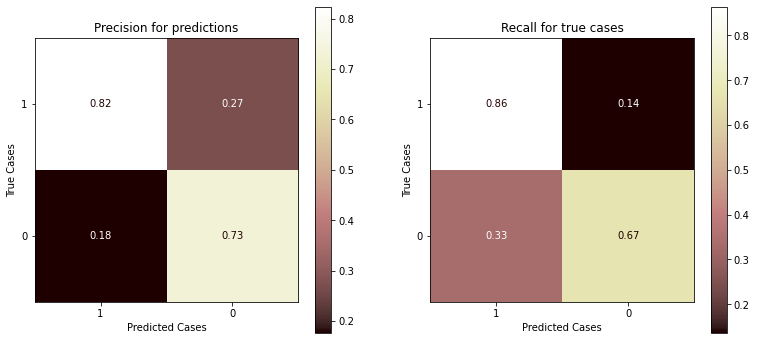

In [9]:
fig, ax = plt.subplots(figsize=(13,6), ncols=2)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_train, normalize='pred', 
                                        display_labels=[1,0],cmap='pink', ax=ax[0])


ConfusionMatrixDisplay.from_predictions(y_test, y_pred_train, normalize='true', 
                                        display_labels=[1,0],cmap='pink', ax=ax[1]);

ax[0].set_title("Precision for predictions")
ax[1].set_title("Recall for true cases")

ax[0].set_xlabel('Predicted Cases')
ax[0].set_ylabel('True Cases')
ax[1].set_xlabel('Predicted Cases')
ax[1].set_ylabel('True Cases');

In [119]:
model_dic['XGB_DRIVER_VISION'].best_estimator_[1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0.015, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [154]:
mdl=model_dic['XGB_DRIVER_VISION'].best_estimator_[1]
ohe=model_dic['XGB_DRIVER_VISION'].best_estimator_[0].transformer_list[0][1][1]

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    list_of_lists=[[range(n_features)],[model.feature_importances_]]
    plt.barh(sorted(list_of_lists), align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

#plot_feature_importances(model_dic['XGB_DRIVER_VISION'].best_estimator_[1])

range(X_train.shape[1])

#mdl.feature_importances_.shape
#ohe.get_feature_names_out()

#ohe.set_params(sparse=True)
model_dic['XGB_DRIVER_VISION'].best_estimator_.named_steps

#fu__cat_pipeline__cat_encoder__sparse=True
None


In [152]:
model_dic['XGB_DRIVER_VISION'].fit(X_test,y_test)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('fu',
                                        FeatureUnion(transformer_list=[('cat_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         DataFrameSelector(attribute_names=['FIRST_CRASH_TYPE',
                                                                                                                            'FIRST_CONTACT_POINT',
                                                                                                                            'MANEUVER',
                                                                                                                            'TRAFFIC_CONTROL_DEVICE',
                                                                                                                            'PHYSICAL_CONDITION',
                                                                                                                            'DRIVER_VISION'])),
                                                                                        ('cat_encoder',
                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                       sparse=False))]))]))...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=90,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      use_label_encoder=False,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             param_grid={'boost__gamma': [0.01, 0.015]}, scoring='roc_auc')

In [141]:
#ohe.get_feature_names_out()

#model_dic['XGB_DRIVER_VISION'].estimator_named_steps['fu']

X_test=model_dic['XGB_DRIVER_VISION'].best_estimator_['fu'].transformer_list[0][1][1].set_params(sparse=True).fit_transform(X_test)

<2500x200 sparse matrix of type '<class 'numpy.float64'>'
	with 50000 stored elements in Compressed Sparse Row format>